<a href="https://colab.research.google.com/github/samilarinc/crypto_prediction/blob/master/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy import signal
import pandas_datareader as web
import datetime as dt

import sklearn.model_selection

import random

In [3]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [4]:
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [5]:
data.keys()

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
length = len(data['High'])

In [7]:
my_arr = list()
for i in range(length):
    my_arr.append(i)
    

In [8]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,3.627890e+07,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,3.009660e+07,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,3.963380e+07,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,3.847750e+07,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,3.452260e+07,431.959991
...,...,...,...,...,...,...
2021-09-04,51868.679688,49538.597656,49937.859375,51753.410156,3.032268e+10,51753.410156
2021-09-05,52700.941406,51053.679688,51769.003906,52633.535156,3.888411e+10,52633.535156
2021-09-06,52853.765625,43285.207031,52660.480469,46811.128906,6.521006e+10,46811.128906


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.index = my_arr

In [11]:
prev_days = 60

In [12]:
rand= np.random.randint(500,1000)

In [13]:
random.seed(77)
array = list()
for i in range(300):
    temp = random.random()
    array.append(int(temp*1000))

In [ ]:
array

In [15]:
train_X_dict = dict()
for i in array:
    train_X_dict[i] = data[i-60:i].values
    
    

In [ ]:
train_X_dict[799]

In [ ]:
 train_X_dict.keys()

dict_keys([799, 325, 240, 822, 115, 476, 557, 611, 145, 630, 500, 851, 28, 957, 172, 813, 507, 835, 182, 321, 87, 778, 533, 204, 191, 80, 200, 560, 437, 704, 76, 839, 982, 739, 743, 849, 94, 461, 79, 781, 537, 106, 444, 776, 552, 121, 936, 56, 843, 974, 751, 945, 530, 219, 472, 738, 768, 384, 947, 35, 495, 39, 358, 989, 117, 985, 905, 688, 55, 471, 691, 95, 298, 91, 915, 923, 750, 575, 62, 481, 760, 755, 26, 8, 88, 924, 113, 390, 475, 883, 135, 261, 771, 85, 164, 25, 958, 233, 501, 379, 981, 712, 601, 489, 267, 103, 621, 295, 276, 453, 189, 591, 70, 18, 141, 89, 878, 510, 678, 779, 165, 951, 460, 488, 695, 193, 828, 428, 251, 864, 872, 858, 323, 913, 775, 970, 754, 999, 478, 749, 524, 504, 400, 868, 378, 746, 561, 706, 309, 78, 675, 359, 48, 911, 588, 677, 22, 720, 586, 639, 823, 270, 160, 968, 60, 515, 623, 955, 86, 702, 620, 848, 47, 748, 148, 404, 850, 4, 31, 780, 38, 784, 807, 817, 633, 824, 542, 668, 69, 550, 990, 388, 714, 178, 541, 769, 322, 468, 577, 939, 386, 659, 556, 195, 69

In [18]:
train_Y_dict = dict()
for i in array:
    train_Y_dict[i] = data['Close'][i]

In [19]:
train_Y_dict[799]

8866.0

In [20]:
train_X = list()
for i in train_X_dict.keys():
    train_X.append(train_X_dict[i])
    

In [21]:
train_Y = list()
for i in train_Y_dict.keys():
    train_Y.append(train_Y_dict[i])

In [22]:
x = list(train_X)

In [23]:
X_list = list()
for i in train_X:
    temp_list = list()
    for j in i:
        temp_list.extend(tuple(j))
    X_list.append(temp_list)
    
        
    

In [24]:
len(X_list[0])

360

In [ ]:
X_list[0]

In [28]:
train_Y[-1]

1317.72998046875

In [29]:
len(X_list[0])

360

In [30]:
len(train_Y)

267

In [31]:
my_list = []
for i in range(len(X_list)):
    if not(len(X_list[i]) == 0) :
        my_list.append(X_list[i])
    else:
        train_Y.pop(i)

        
    

In [33]:
from xgboost import XGBRegressor

In [70]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

In [71]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [90]:
# my_arr = np.array(my_list)
train_Y = np.array(train_Y)
tf.convert_to_tensor(train_Y)
model.fit(my_arr, train_Y, epochs=1,batch_size=1,verbose=2)

TypeError: ignored

In [87]:
my_arr = my_arr[:, :, None]

In [55]:
from pytrends.request import TrendReq
import pandas as pd

pytrend = TrendReq()

In [56]:
pytrend.build_payload(kw_list=["bitcoin"])

In [65]:
pytrend.interest_over_time()

,bitcoin,isPartial
date,,
2016-09-11,2,False
2016-09-18,3,False
2016-09-25,2,False
2016-10-02,3,False
2016-10-09,3,False
...,...,...
2021-08-08,30,False
2021-08-15,27,False
2021-08-22,26,False


In [34]:
regressor = XGBRegressor()

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
alpha = 0.95
regressor = GradientBoostingRegressor(loss='ls', alpha=alpha,
                                n_estimators=400, max_depth=4,
                                learning_rate=0.05)

In [36]:
regressor.fit(np.array(my_list),train_Y)

GradientBoostingRegressor(alpha=0.95, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

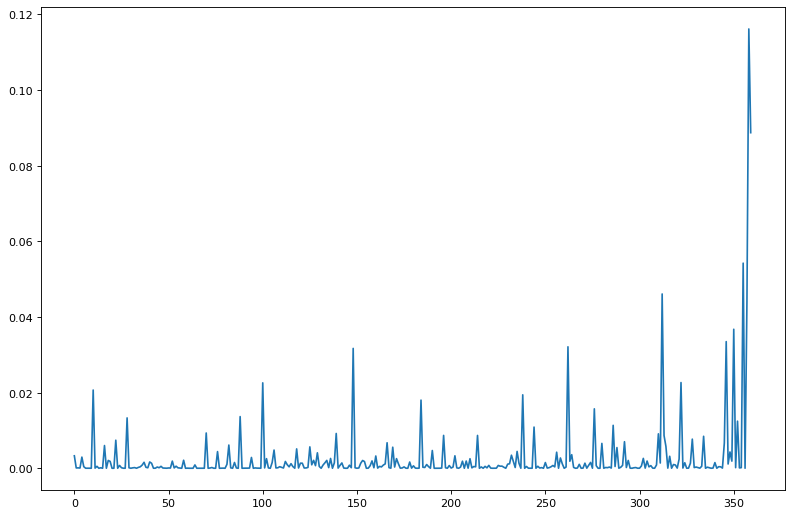

In [37]:
import matplotlib.pyplot
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
plt.plot(regressor.feature_importances_)

In [38]:
predictions = regressor.predict(np.array(my_list))

In [39]:
sklearn.metrics.mean_absolute_error(train_Y, predictions)

45.18152999534276

In [ ]:
for i in range(len(train_Y)):
  print(train_Y[i], end = " ")
  print(train_Y[i]- predictions[i])

In [41]:
start = dt.datetime(2021, 6, 24)
end = dt.datetime.now()
testData = data[500-59:501].values

In [ ]:
# test_X_list = list()
# for i in testData:
#     temp_list = list()
#     for j in i:
#         temp_list.extend(tuple(j))
#     test_X_list.append(temp_list)

In [42]:
test_list = []
for i in testData:
  test_list.extend(i)

In [43]:
regressor.predict(np.array(test_list).reshape(1, 360))

array([655.01240049])

In [47]:
data['Close'][502]

1839.0899658203125

In [ ]:
data['Close'][500-59:501]